## <div class="alert alert-block alert-success"><b>**Business problem and plan for a solution**  </b></div>
The goal is to predict the probability of default of a loan. This can be used to automate approving and declinin loan applications.
**The hypothesis is to check:**
- what features  correlate the most with Loan status
- issuing higher grade loans to clients with better credit history and less loans to those with worse credit history
- how ownership of the property influances the default
- what age range is at risk
- if higher interest rates make risk to default on loans
    
 Will be perfomed:
- EDA
- Cleaning, feature engeeniring
- Assosiation and correlations of the variables
- Prediction using Models: Classification Logistics Regression

## <div class="alert alert-block alert-success"><b>**Dataset description**</div>
 N|Feature Name | Description |
--| ----------- | ----------- |
1 | person_age | Age
2 | person_income | Annual Income
3 | person_home_ownership | Home ownership
4 | person_emp_length | Employment length (in years)
5 | loan_intent | Loan intent
6 | loan_grade | Loan grade
7 | loan_amnt | Loan amount
8 | loan_int_rate | Interest rate
9 | loan_status | Loan status (0 is non default 1 is default)
10| loan_percent_income | Percent income
11| cb_person_default_on_file | Historical default
12| cb_preson_cred_hist_length | Credit history length
  

In [39]:
#pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
#import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

from sklearn.feature_selection import VarianceThreshold

import requests
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

In [3]:
original = pd.read_csv("credit_risk_dataset.csv.zip", skipinitialspace = True)
original.describe(percentiles=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
0%,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
10%,22.000000,2.859000e+04,0.000000,3000.000000,6.910000,0.000000,0.050000,2.000000
20%,23.000000,3.500000e+04,1.000000,4400.000000,7.510000,0.000000,0.080000,3.000000
30%,24.000000,4.200000e+04,2.000000,5400.000000,8.900000,0.000000,0.100000,3.000000
40%,25.000000,4.900000e+04,3.000000,6750.000000,10.250000,0.000000,0.120000,4.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000


In [4]:
# Get test sample and remove test sample from train data
test = original.sample(frac = 0.1, random_state = 42).copy()
train = original.drop(test.index)
y_train = train.drop(columns = 'loan_status')

In [5]:
y_test = test['loan_status']
X_test = test.drop(columns = 'loan_status')

In [6]:
del test

In [113]:
train.describe(percentiles=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,encoded_q_loan_percent_income,encoded_bin_loan_percent_income
count,29323.000000,29323.000000,29323.000000,29323.000000,29323.000000,29323.000000,29323.000000,29323.00000,29323.000000,29323.000000
mean,27.678614,64398.726938,4.754812,9599.156805,11.011271,0.216554,0.170218,5.81107,0.216554,0.216372
std,5.940068,37862.138893,3.874913,6330.565134,3.077491,0.411903,0.106869,4.05248,0.155623,0.159931
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.00000,0.114165,0.121887
0%,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.00000,0.114165,0.121887
10%,22.000000,28800.000000,0.000000,3000.000000,6.920000,0.000000,0.050000,2.00000,0.114165,0.121887
20%,23.000000,35000.000000,1.000000,4400.000000,7.750000,0.000000,0.080000,3.00000,0.114165,0.121887
30%,24.000000,42000.000000,2.000000,5465.000000,9.320000,0.000000,0.100000,3.00000,0.118800,0.121887
40%,25.000000,49000.000000,3.000000,6725.000000,10.620000,0.000000,0.120000,4.00000,0.118800,0.121887
50%,26.000000,55000.000000,4.000000,8000.000000,11.011271,0.000000,0.150000,4.00000,0.149478,0.121887


In [8]:
train.shape, X_test.shape

((29323, 12), (3258, 11))

## <div class="alert alert-block alert-success"><b>EDA and Data Analysis</div>

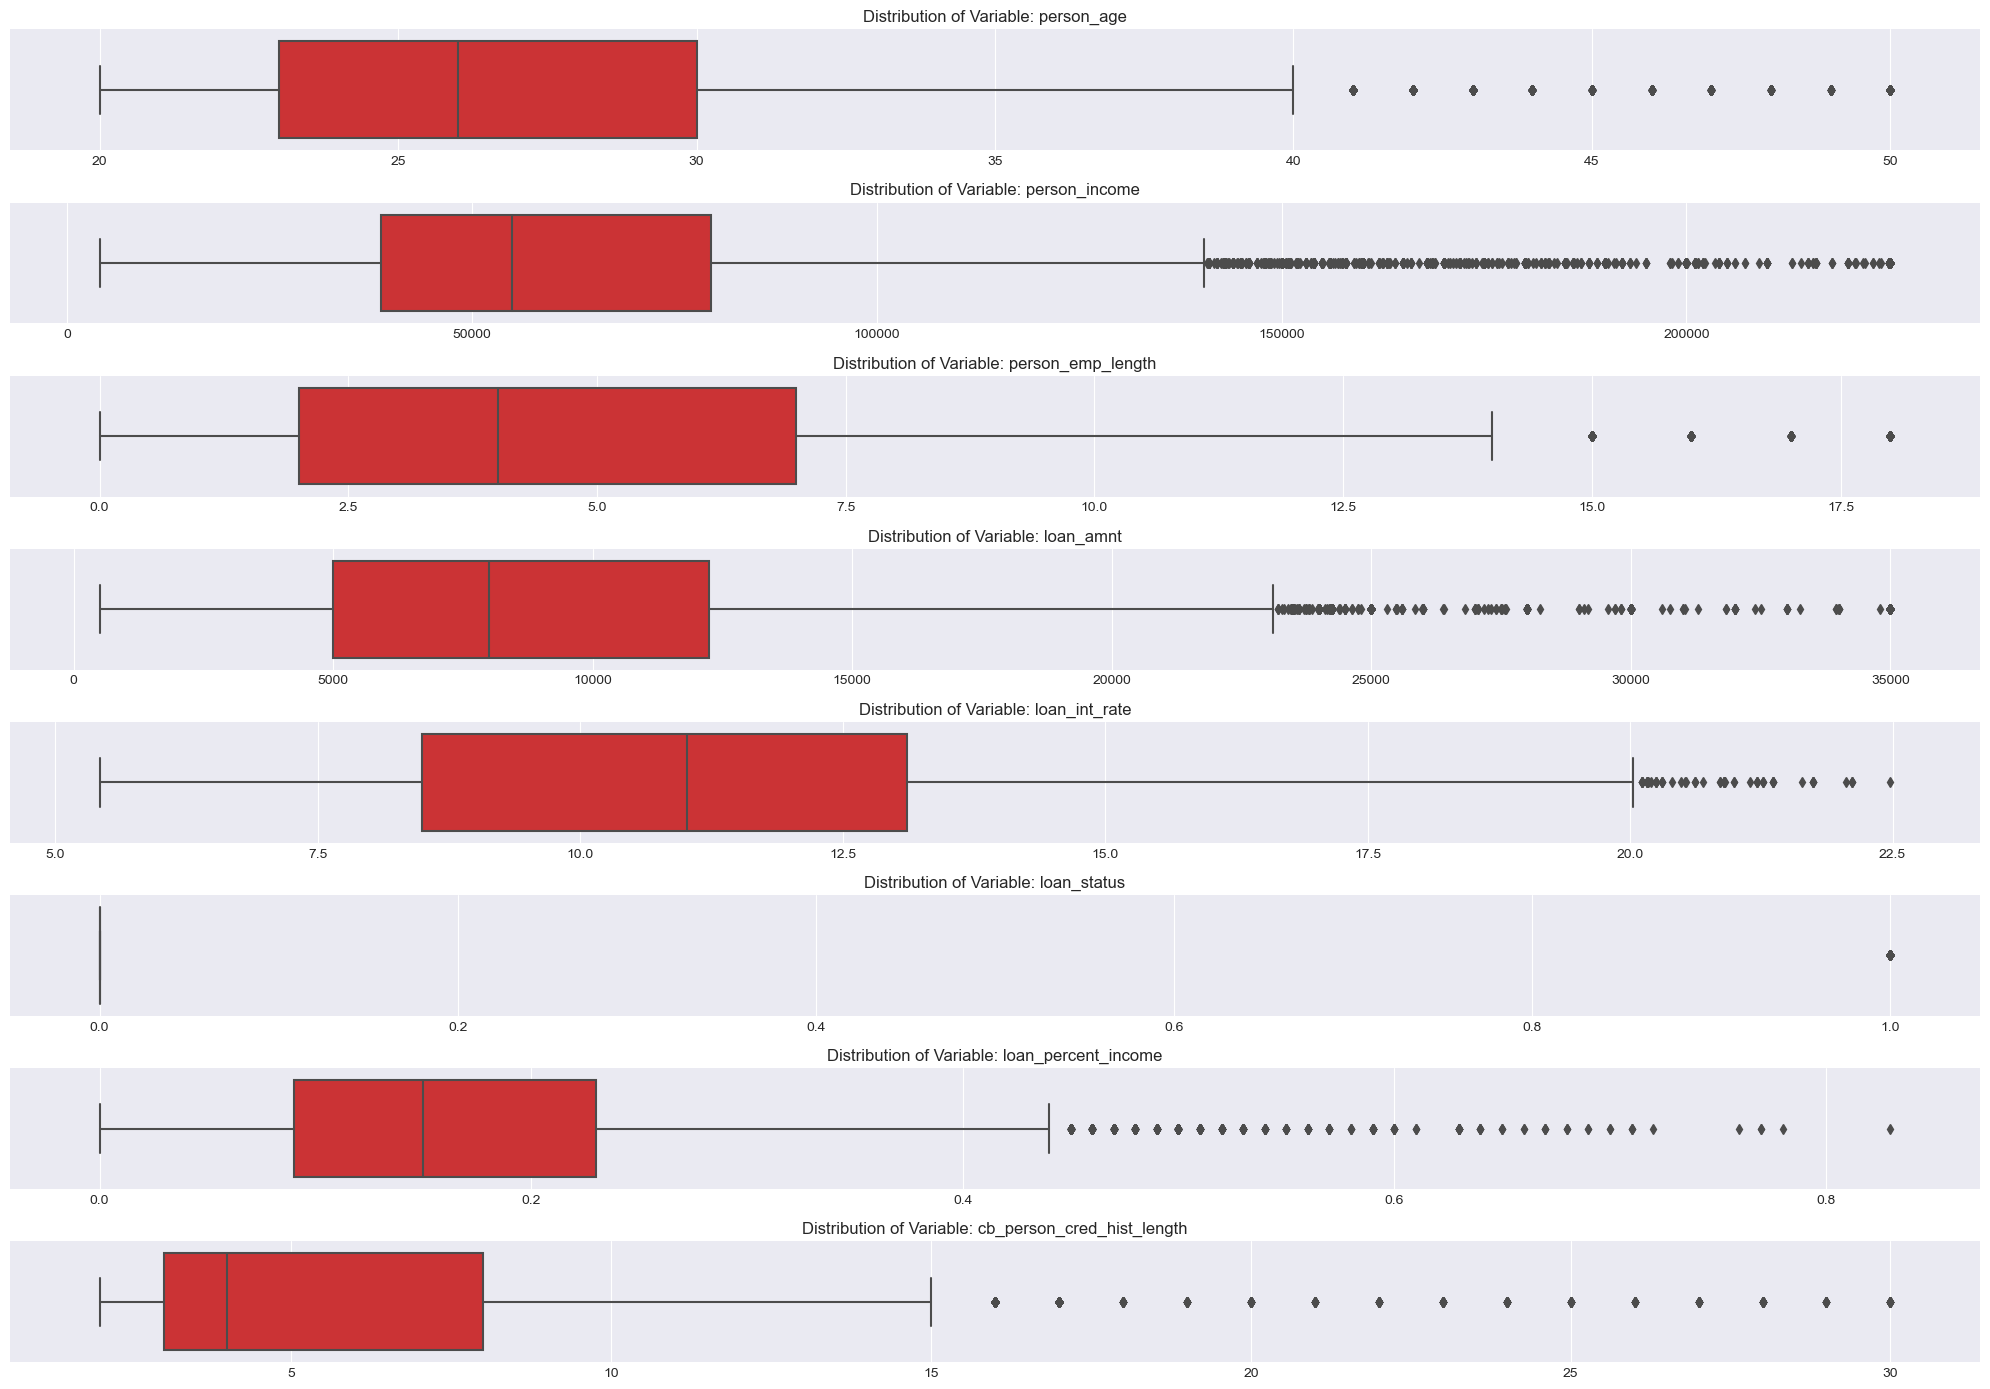

In [134]:
fig, axes = plt.subplots(8, 1, figsize = (20, 14))
axes = axes.ravel() 
cols =train.select_dtypes(include = [np.number]).columns[:]

for col, ax in zip(cols, axes):
    data = train.select_dtypes(include = [np.number])
    sns.boxplot(data=data, x=col, ax = ax, palette = 'Set1')
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
#fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

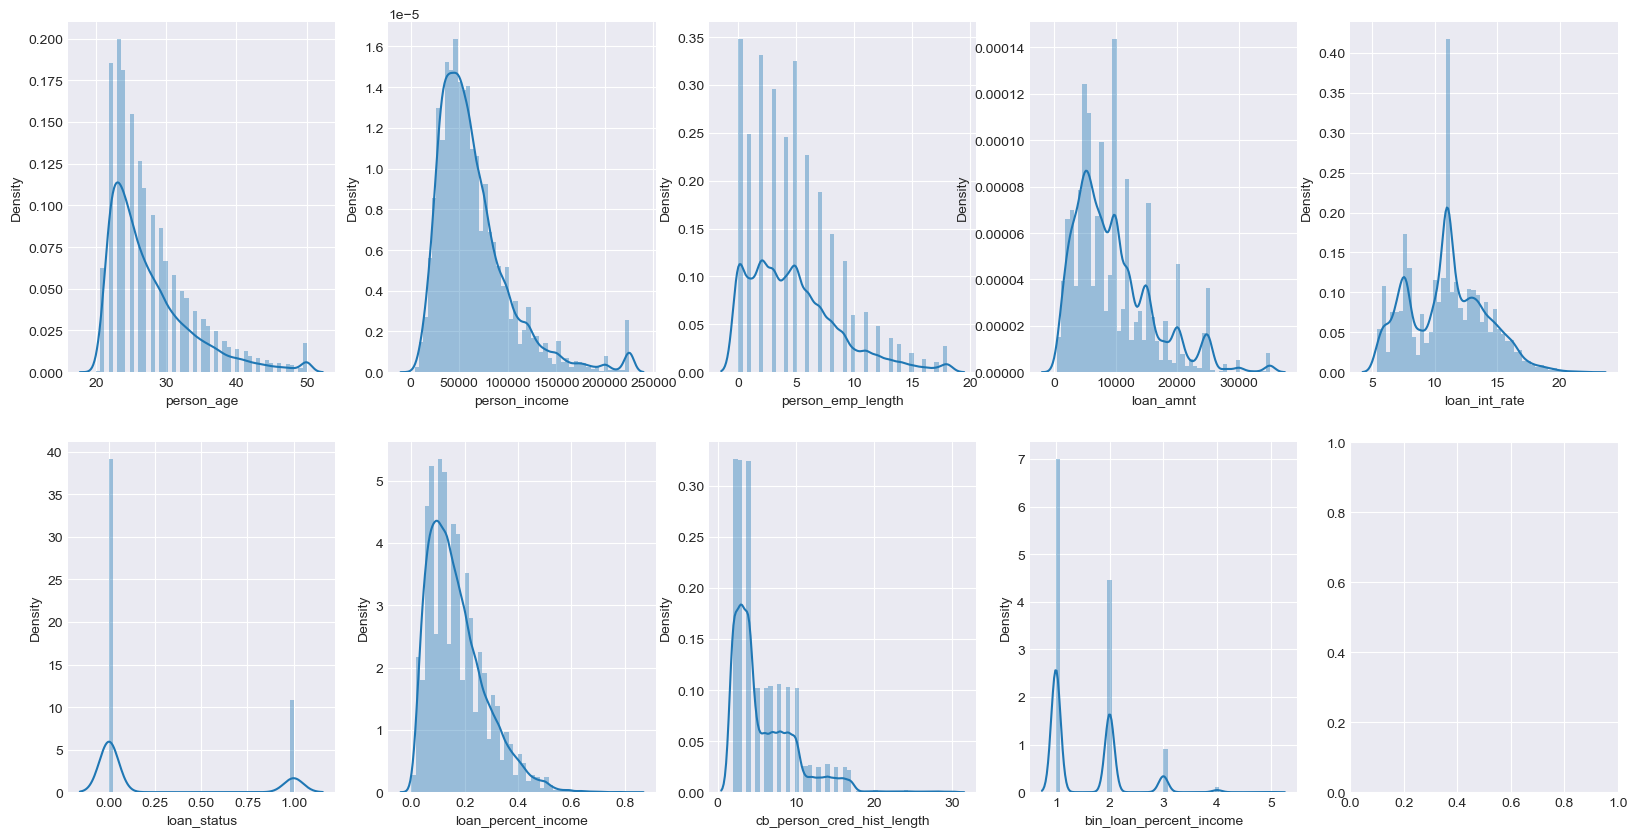

In [136]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train.select_dtypes(exclude=['object']).items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [22]:
# Let's see the outliers percentage in every column.
for k, v in original.select_dtypes(include='number').items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(original)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column person_age outliers = 4.59%
Column person_income outliers = 4.55%
Column person_emp_length outliers = 2.62%
Column loan_amnt outliers = 5.30%
Column loan_int_rate outliers = 0.02%
Column loan_status outliers = 100.00%
Column loan_percent_income outliers = 2.00%
Column cb_person_cred_hist_length outliers = 3.51%


In [25]:
X_test.describe(percentiles=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,3258.000000,3.258000e+03,3165.000000,3258.000000,2942.000000,3258.000000,3258.000000
mean,27.557397,6.515915e+04,4.848341,9501.296808,11.015520,0.170071,5.742480
std,6.146352,4.985473e+04,4.570878,6245.530797,3.282137,0.106012,4.077727
min,20.000000,4.200000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
0%,20.000000,4.200000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
10%,22.000000,2.800000e+04,0.000000,3000.000000,6.760000,0.050000,2.000000
20%,23.000000,3.500000e+04,1.000000,4400.000000,7.510000,0.080000,3.000000
30%,24.000000,4.151000e+04,2.000000,5400.000000,8.880000,0.100000,3.000000
40%,25.000000,4.871900e+04,3.000000,6800.000000,10.080000,0.120000,4.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000


In [26]:
config = {
    'threshold_age': 50}

In [27]:
# Replace outliers with 99% percentile
def preproc_data(data, config):
    train = data.copy()
    train.loc[train['person_age']>config['threshold_age'], 'person_age'] = config['threshold_age']
    train.loc[train['person_income']>225200.0, 'person_income'] = 225200.0
    train.loc[train['person_emp_length']>18, 'person_emp_length'] = 18
    train.loc[train['person_home_ownership']=='OTHER', "person_home_ownership"] = "RENT"
    return train

In [28]:
train = preproc_data(data =train , config = config)
#X_test = preproc_data(data =X_test , config = config)

In [29]:
for jcol in train.dtypes[train.dtypes=='object'].index:
    tmp_vc = train[jcol].value_counts(normalize=True).to_frame()
    tmp_vc.columns = ['share']
    mean_t = train.groupby(jcol)['loan_status'].mean().to_frame()
    mean_t.columns = ['mean_loan_status']
    print(jcol, '\n', tmp_vc.join(mean_t).round(4).sort_values('mean_loan_status'),'\n')

person_home_ownership 
            share  mean_loan_status
OWN       0.0794            0.0752
MORTGAGE  0.4134            0.1249
RENT      0.5072            0.3134 

loan_intent 
                     share  mean_loan_status
VENTURE            0.1754            0.1462
EDUCATION          0.1984            0.1722
PERSONAL           0.1695            0.1998
HOMEIMPROVEMENT    0.1105            0.2576
MEDICAL            0.1864            0.2630
DEBTCONSOLIDATION  0.1598            0.2838 

loan_grade 
     share  mean_loan_status
A  0.3301            0.0985
B  0.3221            0.1632
C  0.1978            0.2050
D  0.1116            0.5836
E  0.0293            0.6442
F  0.0072            0.7062
G  0.0019            0.9821 

cb_person_default_on_file 
     share  mean_loan_status
N  0.8239            0.1831
Y  0.1761            0.3731 



### Feature Engineering

In [38]:
train['meta_grade'] = train['loan_grade']
train.groupby(['meta_grade', 'person_home_ownership']
)['loan_status'].mean().unstack(-1).style.background_gradient(cmap=cm)

person_home_ownership,MORTGAGE,OWN,RENT
meta_grade,,,
A,0.043390,0.074879,0.171994
B,0.080131,0.043896,0.240737
C,0.139109,0.059603,0.264724
D,0.453478,0.067729,0.726607
E,0.468439,0.510204,0.760784
F,0.620690,0.538462,0.792793
G,1.000000,1.000000,0.954545


In [47]:
train.loc[(train['person_home_ownership'] == 'OWN') 
        & (train['loan_grade'].isin(['A', 'B', 'C', 'D'])), 'meta_grade'] = 'A'
train.loc[(train['person_home_ownership'] == 'RENT') 
        & (train['loan_grade'].isin(['D', 'E', 'F'])), 'meta_grade'] = 'D'
train.loc[(train['person_home_ownership'] == 'OWN') 
        & (train['loan_grade'].isin(['E', 'F'])), 'meta_grade'] = 'E'
train.loc[(train['person_home_ownership'] == 'RENT') 
        & (train['loan_grade'].isin(['B', 'C'])), 'meta_grade'] = 'B'

In [48]:
train.groupby(['meta_grade', 'person_home_ownership']
)['loan_status'].mean().unstack(-1).style.background_gradient(cmap=cm)

person_home_ownership,MORTGAGE,OWN,RENT
meta_grade,,,
A,0.043390,0.061035,0.171994
B,0.080131,nan,0.250269
C,0.139109,nan,nan
D,0.453478,nan,0.736385
E,0.468439,0.516129,nan
F,0.620690,nan,nan
G,1.000000,1.000000,0.954545


We will combine together similar groups that don't differ much to create new feature

In [ ]:
# train.query('loan_grade == "G" & person_home_ownership == "MORTGAGE"')

In [49]:
train.groupby(['person_home_ownership', 'loan_intent']
)['loan_status'].mean().unstack(-1).style.background_gradient(cmap=cm)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
person_home_ownership,,,,,,
MORTGAGE,0.191551,0.085546,0.135582,0.210977,0.089151,0.045752
OWN,0.378788,0.057495,0.106529,0.095607,0.065274,0.040616
RENT,0.357115,0.260649,0.428571,0.317388,0.315896,0.259123


In [50]:
train['meta_person_home_ownership'] = train['person_home_ownership']
train.loc[(train['loan_intent'] == 'VENTURE') 
        & (train['person_home_ownership'].isin(['MORTGAGE', 'OWN'])), 'meta_person_home_ownership'] = 'MORTGAGE'

In [52]:
train.groupby(['loan_grade', 'loan_intent'])['loan_status'].mean().unstack(-1).style.background_gradient(cmap=cm)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_grade,,,,,,
A,0.110543,0.092065,0.129794,0.111868,0.105518,0.055782
B,0.188092,0.157285,0.211423,0.169053,0.186430,0.090909
C,0.228388,0.182637,0.254839,0.205641,0.184748,0.197382
D,0.923221,0.342282,0.540541,0.874363,0.434635,0.387283
E,1.000000,0.445087,0.527559,0.952703,0.492308,0.506410
F,1.000000,0.571429,0.703704,0.954545,0.555556,0.371429
G,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077


In [57]:
train.groupby(['meta_loan_intent_grade', 'loan_intent'])['loan_status'].mean().unstack(-1).style.background_gradient(cmap=cm)

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
meta_loan_intent_grade,,,,,,
A,0.110543,0.092065,0.129794,0.111868,0.105518,0.055782
B,0.188092,0.157285,0.211423,0.169053,0.186430,0.090909
C,0.228388,0.182637,0.254839,0.205641,0.184748,0.197382
D,0.941926,0.342282,0.540541,0.874363,0.434635,0.387283
E,nan,0.445087,0.527559,0.955446,0.492308,0.506410
F,nan,0.571429,0.703704,nan,0.555556,0.371429
G,nan,1.000000,1.000000,nan,1.000000,0.923077


In [56]:
train['meta_loan_intent_grade'] = train['loan_grade']
train.loc[(train['loan_intent'] == 'DEBTCONSOLIDATION') & (train['loan_grade'].isin(['D','E', 'F', 'G'])), 'loan_grade'] = 'D'
train.loc[(train['loan_intent'] == 'MEDICAL') & (train['loan_grade'].isin(['E', 'F', 'G'])), 'loan_grade'] = 'E'

In [58]:
train.groupby(['loan_grade', 'loan_percent_income'])['loan_status'].mean().unstack(-1).style.background_gradient(cmap=cm)

loan_percent_income,0.000000,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,0.100000,0.110000,0.120000,0.130000,0.140000,0.150000,0.160000,0.170000,0.180000,0.190000,0.200000,0.210000,0.220000,0.230000,0.240000,0.250000,0.260000,0.270000,0.280000,0.290000,0.300000,0.310000,0.320000,0.330000,0.340000,0.350000,0.360000,0.370000,0.380000,0.390000,0.400000,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000,0.510000,0.520000,0.530000,0.540000,0.550000,0.560000,0.570000,0.580000,0.590000,0.600000,0.610000,0.630000,0.640000,0.650000,0.660000,0.670000,0.680000,0.690000,0.700000,0.710000,0.720000,0.760000,0.770000,0.780000,0.830000
loan_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.017241,0.038760,0.027344,0.022222,0.046229,0.044990,0.049407,0.046748,0.027778,0.033663,0.032609,0.022989,0.034205,0.035088,0.023377,0.050704,0.075000,0.090253,0.084291,0.058065,0.082927,0.093567,0.068293,0.053191,0.092896,0.161290,0.112000,0.099010,0.089109,0.131313,0.557143,0.593220,0.613861,0.564516,0.507937,0.596774,0.527778,0.615385,0.545455,0.705882,0.500000,0.694444,0.550000,0.500000,0.894737,0.533333,0.684211,0.777778,0.800000,0.586207,0.444444,0.857143,0.857143,nan,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,nan,nan,1.000000,nan,nan,0.500000,1.000000,nan,nan,1.000000,nan
B,nan,0.000000,0.045872,0.054622,0.120996,0.053797,0.057229,0.078818,0.094488,0.082927,0.071594,0.075000,0.066667,0.051765,0.066482,0.085106,0.114286,0.099196,0.078947,0.093633,0.096154,0.120968,0.093137,0.114428,0.123810,0.108696,0.136646,0.158192,0.100671,0.131034,0.135714,0.688312,0.560000,0.692913,0.740741,0.629032,0.620690,0.625000,0.708861,0.608696,0.670732,0.787879,0.735849,0.650000,0.604651,0.347826,0.636364,0.666667,0.636364,0.600000,0.708333,0.600000,0.888889,0.500000,0.750000,0.857143,0.750000,1.000000,0.666667,0.888889,0.500000,nan,0.500000,1.000000,0.000000,1.000000,nan,0.000000,0.500000,nan,nan,nan,1.000000,1.000000,nan,0.000000
C,0.000000,0.071429,0.120000,0.088608,0.113636,0.063927,0.105505,0.113043,0.142308,0.128755,0.141791,0.092920,0.131915,0.089431,0.165919,0.090164,0.118343,0.161137,0.121547,0.194595,0.119565,0.144509,0.217647,0.094203,0.180451,0.186047,0.241379,0.127907,0.269231,0.170213,0.180556,0.734375,0.718750,0.720000,0.734694,0.702128,0.755102,0.740741,0.742857,0.600000,0.785714,0.869565,0.827586,0.807692,0.750000,1.000000,0.700000,0.941176,0.647059,0.833333,0.692308,1.000000,1.000000,0.875000,0.500000,1.000000,1.000000,1.000000,nan,0.666667,0.000000,nan,1.000000,nan,1.000000,nan,1.000000,nan,nan,0.000000,1.000000,nan,nan,nan,nan,nan
D,nan,0.555556,0.545455,0.452830,0.474359,0.478723,0.478261,0.561798,0.589744,0.564356,0.522388,0.543103,0.480392,0.601504,0.538462,0.507463,0.625000,0.520000,0.604651,0.623188,0.566038,0.549020,0.603960,0.563107,0.580247,0.489130,0.772727,0.658824,0.679487,0.545455,0.578125,0.740741,0.829787,0.847458,0.972973,0.657895,0.761905,0.766667,0.868421,0.833333,0.750000,1.000000,0.952381,0.769231,0.875000,0.923077,0.916667,1.000000,0.857143,1.000000,0.818182,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,nan,1.000000,1.000000,1.000000,1.000000,1.000000,nan,nan,1.000000,1.000000,nan,1.000000,nan,nan,nan,nan,nan,nan
E,nan,nan,0.333333,0.777778,0.428571,0.526316,0.470588,0.523810,0.612903,0.588235,0.551724,0.550000,0.565217,0.500000,0.629630,0.333333,0.739130,0.463415,0.450000,0.520000,0.542857,0.500000,0.428571,0.516129,0.583333,0.571429,0.592593,0.652174,0.764706,0.714286,0.529412,0.882353,0.941176,0.538462,0.733333,0.750000,1.000000,0.888889,1.000000,1.000000,0.750000,0.750000,0.833333,1.000000,1.000000,0.750000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,1.000000,nan,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
F,nan,nan,nan,1.000000,0.500000,0.000000,0.500000,0.444444,0.000

In [59]:
#train.groupby(['loan_percent_income'])['loan_status'].mean().head(40)

In [118]:
train['q_loan_percent_income'] = pd.qcut(train['loan_percent_income'],q = 5)

In [61]:
train['bin_loan_percent_income'] = pd.cut(train['loan_percent_income'],bins = 5, labels = ['1','2',' 3', '4', '5'])
train_cat = train.select_dtypes(include = ['object', 'category'])


In [119]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
train['encoded_q_loan_percent_income'] = encoder.fit_transform(train['q_loan_percent_income'], train['loan_status'])
train['encoded_q_loan_percent_income']

0        0.530526
1        0.118800
2        0.530526
3        0.530526
4        0.530526
           ...   
32575    0.114165
32576    0.118800
32577    0.149478
32579    0.118800
32580    0.149478
Name: encoded_q_loan_percent_income, Length: 29323, dtype: float64

In [120]:
train['encoded_bin_loan_percent_income'] = encoder.fit_transform(train['bin_loan_percent_income'], train['loan_status'])
train['encoded_bin_loan_percent_income']

0        0.756272
1        0.121887
2        0.756272
3        0.756272
4        0.756272
           ...   
32575    0.121887
32576    0.121887
32577    0.121887
32579    0.121887
32580    0.121887
Name: encoded_bin_loan_percent_income, Length: 29323, dtype: float64

In [ ]:
# train.drop(columns = ['bin_loan_percent_income', 'loan_percent_income'], inplace = True)
# train.columns

In [66]:
null_values = (train.isnull().sum().sort_values(ascending = False)*100 / len(train)).round(2)
null_values[null_values >0.00]

loan_int_rate        9.55
person_emp_length    2.74
dtype: float64

In [67]:
# Fill Null values with mean as they are only in numerical columns and outliers are already removed
train.fillna(train.mean(), inplace = True)

In [69]:
train['loan_status'].value_counts(normalize = True)

0    0.783446
1    0.216554
Name: loan_status, dtype: float64

Text(0, 0.5, 'Loan Percent Income')

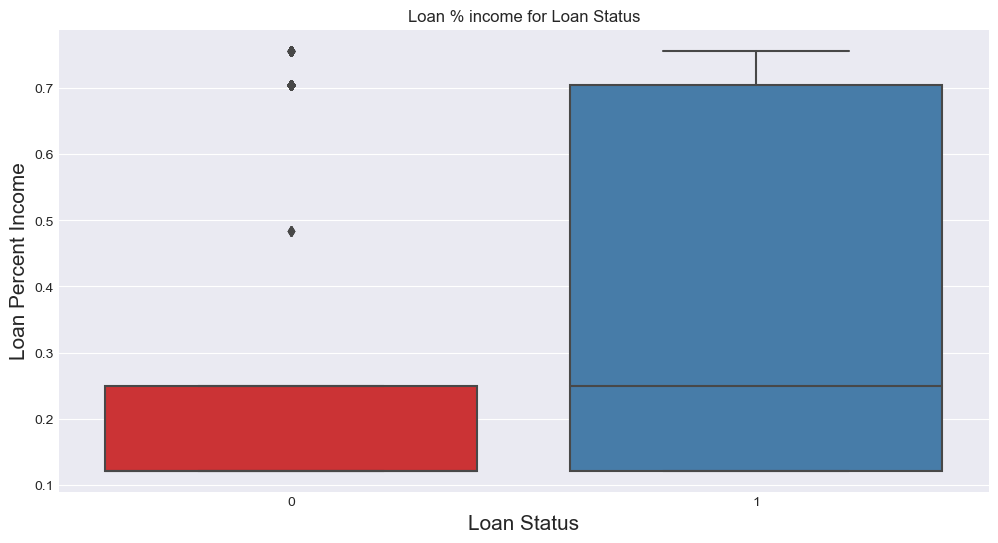

In [70]:
q = train[['loan_status', 'encoded_bin_loan_percent_income']]
f, ax = plt.subplots(figsize = (12, 6));
sns.boxplot(x = 'loan_status', y = 'encoded_bin_loan_percent_income', data = q, palette = 'Set1')
plt.title('Loan % income for Loan Status')
plt.xlabel('Loan Status', fontsize = 15)
plt.ylabel('Loan Percent Income', fontsize = 15)

In [121]:
train.corrwith(train['loan_status']).sort_values(axis=0, ascending = False) # by default it is pearson correlation

loan_status                        1.000000
encoded_bin_loan_percent_income    0.389010
loan_percent_income                0.381931
encoded_q_loan_percent_income      0.377815
loan_int_rate                      0.315946
loan_amnt                          0.107776
cb_person_cred_hist_length        -0.015329
person_age                        -0.021399
person_emp_length                 -0.084008
person_income                     -0.219496
dtype: float64

**We can pay attention to loan_percent_income and loan_int_rate as they correlate the most**

In [74]:
train['person_home_ownership'].value_counts(normalize = True)

RENT        0.507213
MORTGAGE    0.413396
OWN         0.079392
Name: person_home_ownership, dtype: float64

In [72]:
# Make lists of categorical columns and numerical columns
#train['loan_status'] = train['loan_status'].astype('category', copy=False)
categ_col = train.select_dtypes(include = ['object', 'category']).columns.tolist()
num_col = train.select_dtypes(include='number').columns.tolist()

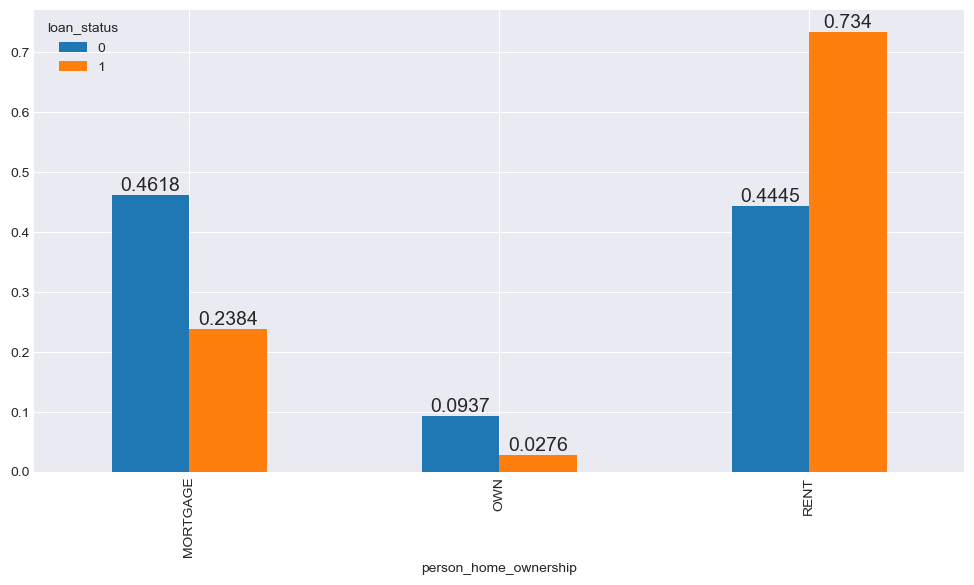

In [75]:
plot_train = train.groupby(['person_home_ownership', 'loan_status']).size().unstack(-1)
plot_train = round(plot_train/plot_train.sum(), 4)#.sum()
#plot_train/plot_train.sum()
ax = plot_train.plot(kind = 'bar', figsize = (12, 6))
ax.bar_label(ax.containers[-1], label_type='edge', fontsize=14)
ax.bar_label(ax.containers[-2], label_type='edge', fontsize=14);

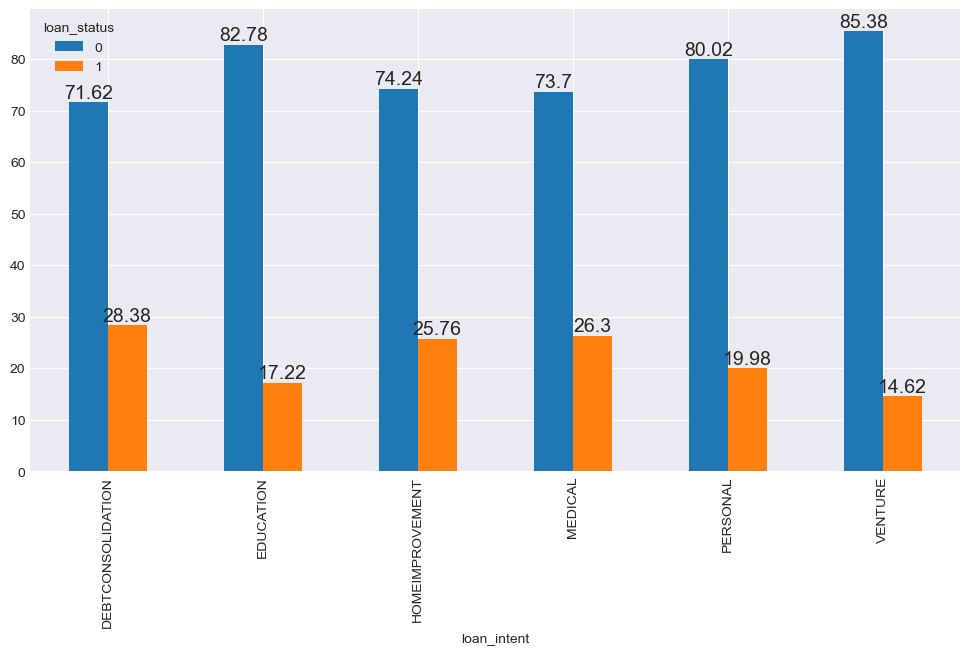

In [148]:
cross_col = pd.crosstab(index = train['loan_intent'], columns = train['loan_status'], normalize = 'index').round(4)*100
ax = cross_col.plot(kind = 'bar', figsize = (12, 6))
ax.bar_label(ax.containers[-1], label_type='edge', fontsize=14)
ax.bar_label(ax.containers[-2], label_type='edge', fontsize=14);

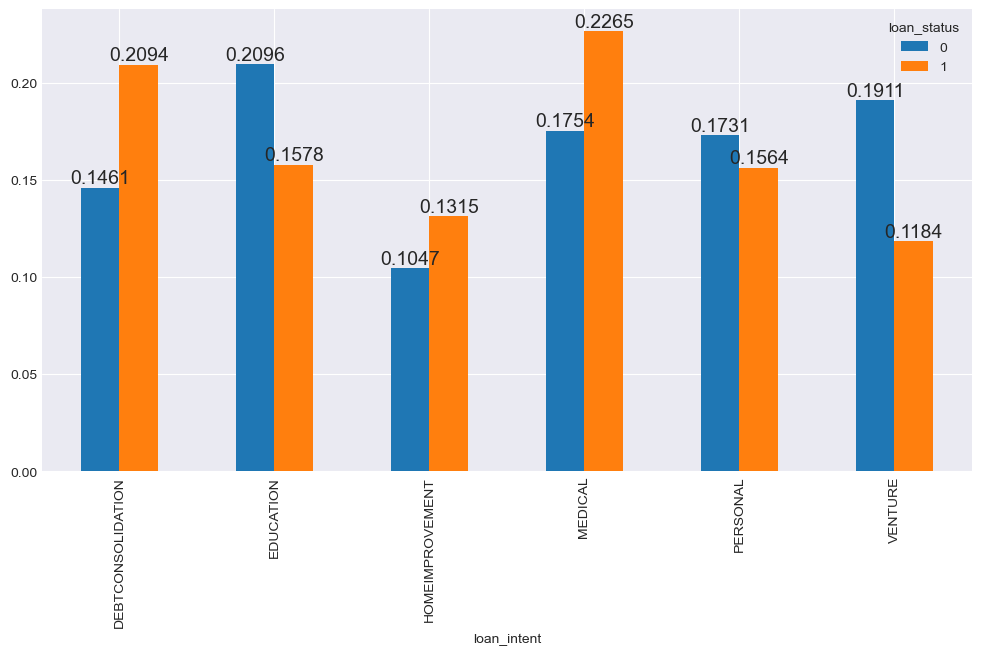

In [79]:
plot_train = train.groupby(['loan_intent', 'loan_status']).size().unstack(-1)
plot_train = round(plot_train/plot_train.sum(), 4)#.sum()
#plot_train/plot_train.sum()
ax = plot_train.plot(kind = 'bar', figsize = (12, 6))
ax.bar_label(ax.containers[-1], label_type='edge', fontsize=14)
ax.bar_label(ax.containers[-2], label_type='edge', fontsize=14);

In [81]:
plot_train = train.groupby(['loan_intent', 'loan_status']).agg('size').unstack(-1)
plot_train = plot_train/plot_train.iloc[:].sum()
plot_train

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.146085,0.209449
EDUCATION,0.209637,0.157795
HOMEIMPROVEMENT,0.104732,0.131496
MEDICAL,0.175380,0.226457
PERSONAL,0.173073,0.156378
VENTURE,0.191094,0.118425


<AxesSubplot:xlabel='cb_person_cred_hist_length'>

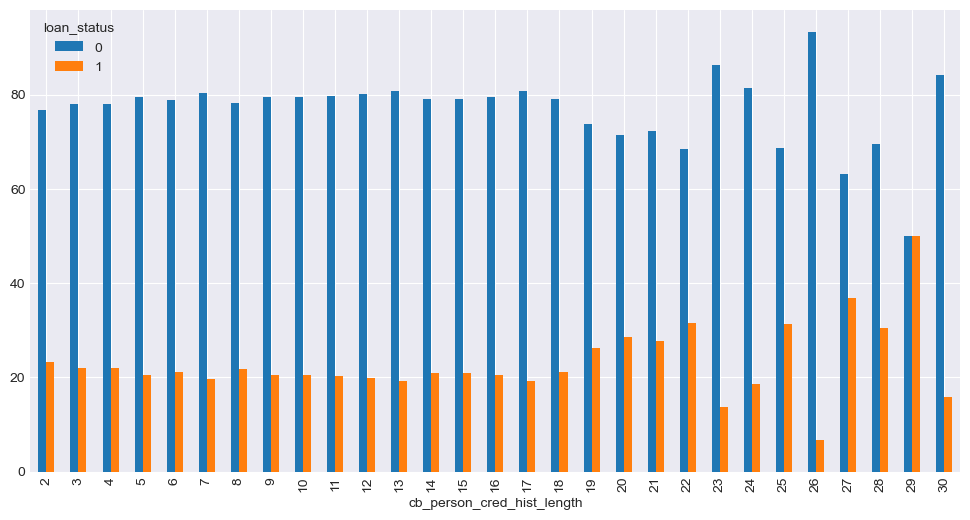

In [153]:
cross_hist_length = pd.crosstab(index = train['cb_person_cred_hist_length'], columns = train['loan_status'], normalize ='index').round(4)*100
cross_hist_length.plot(kind = 'bar', figsize = (12, 6))

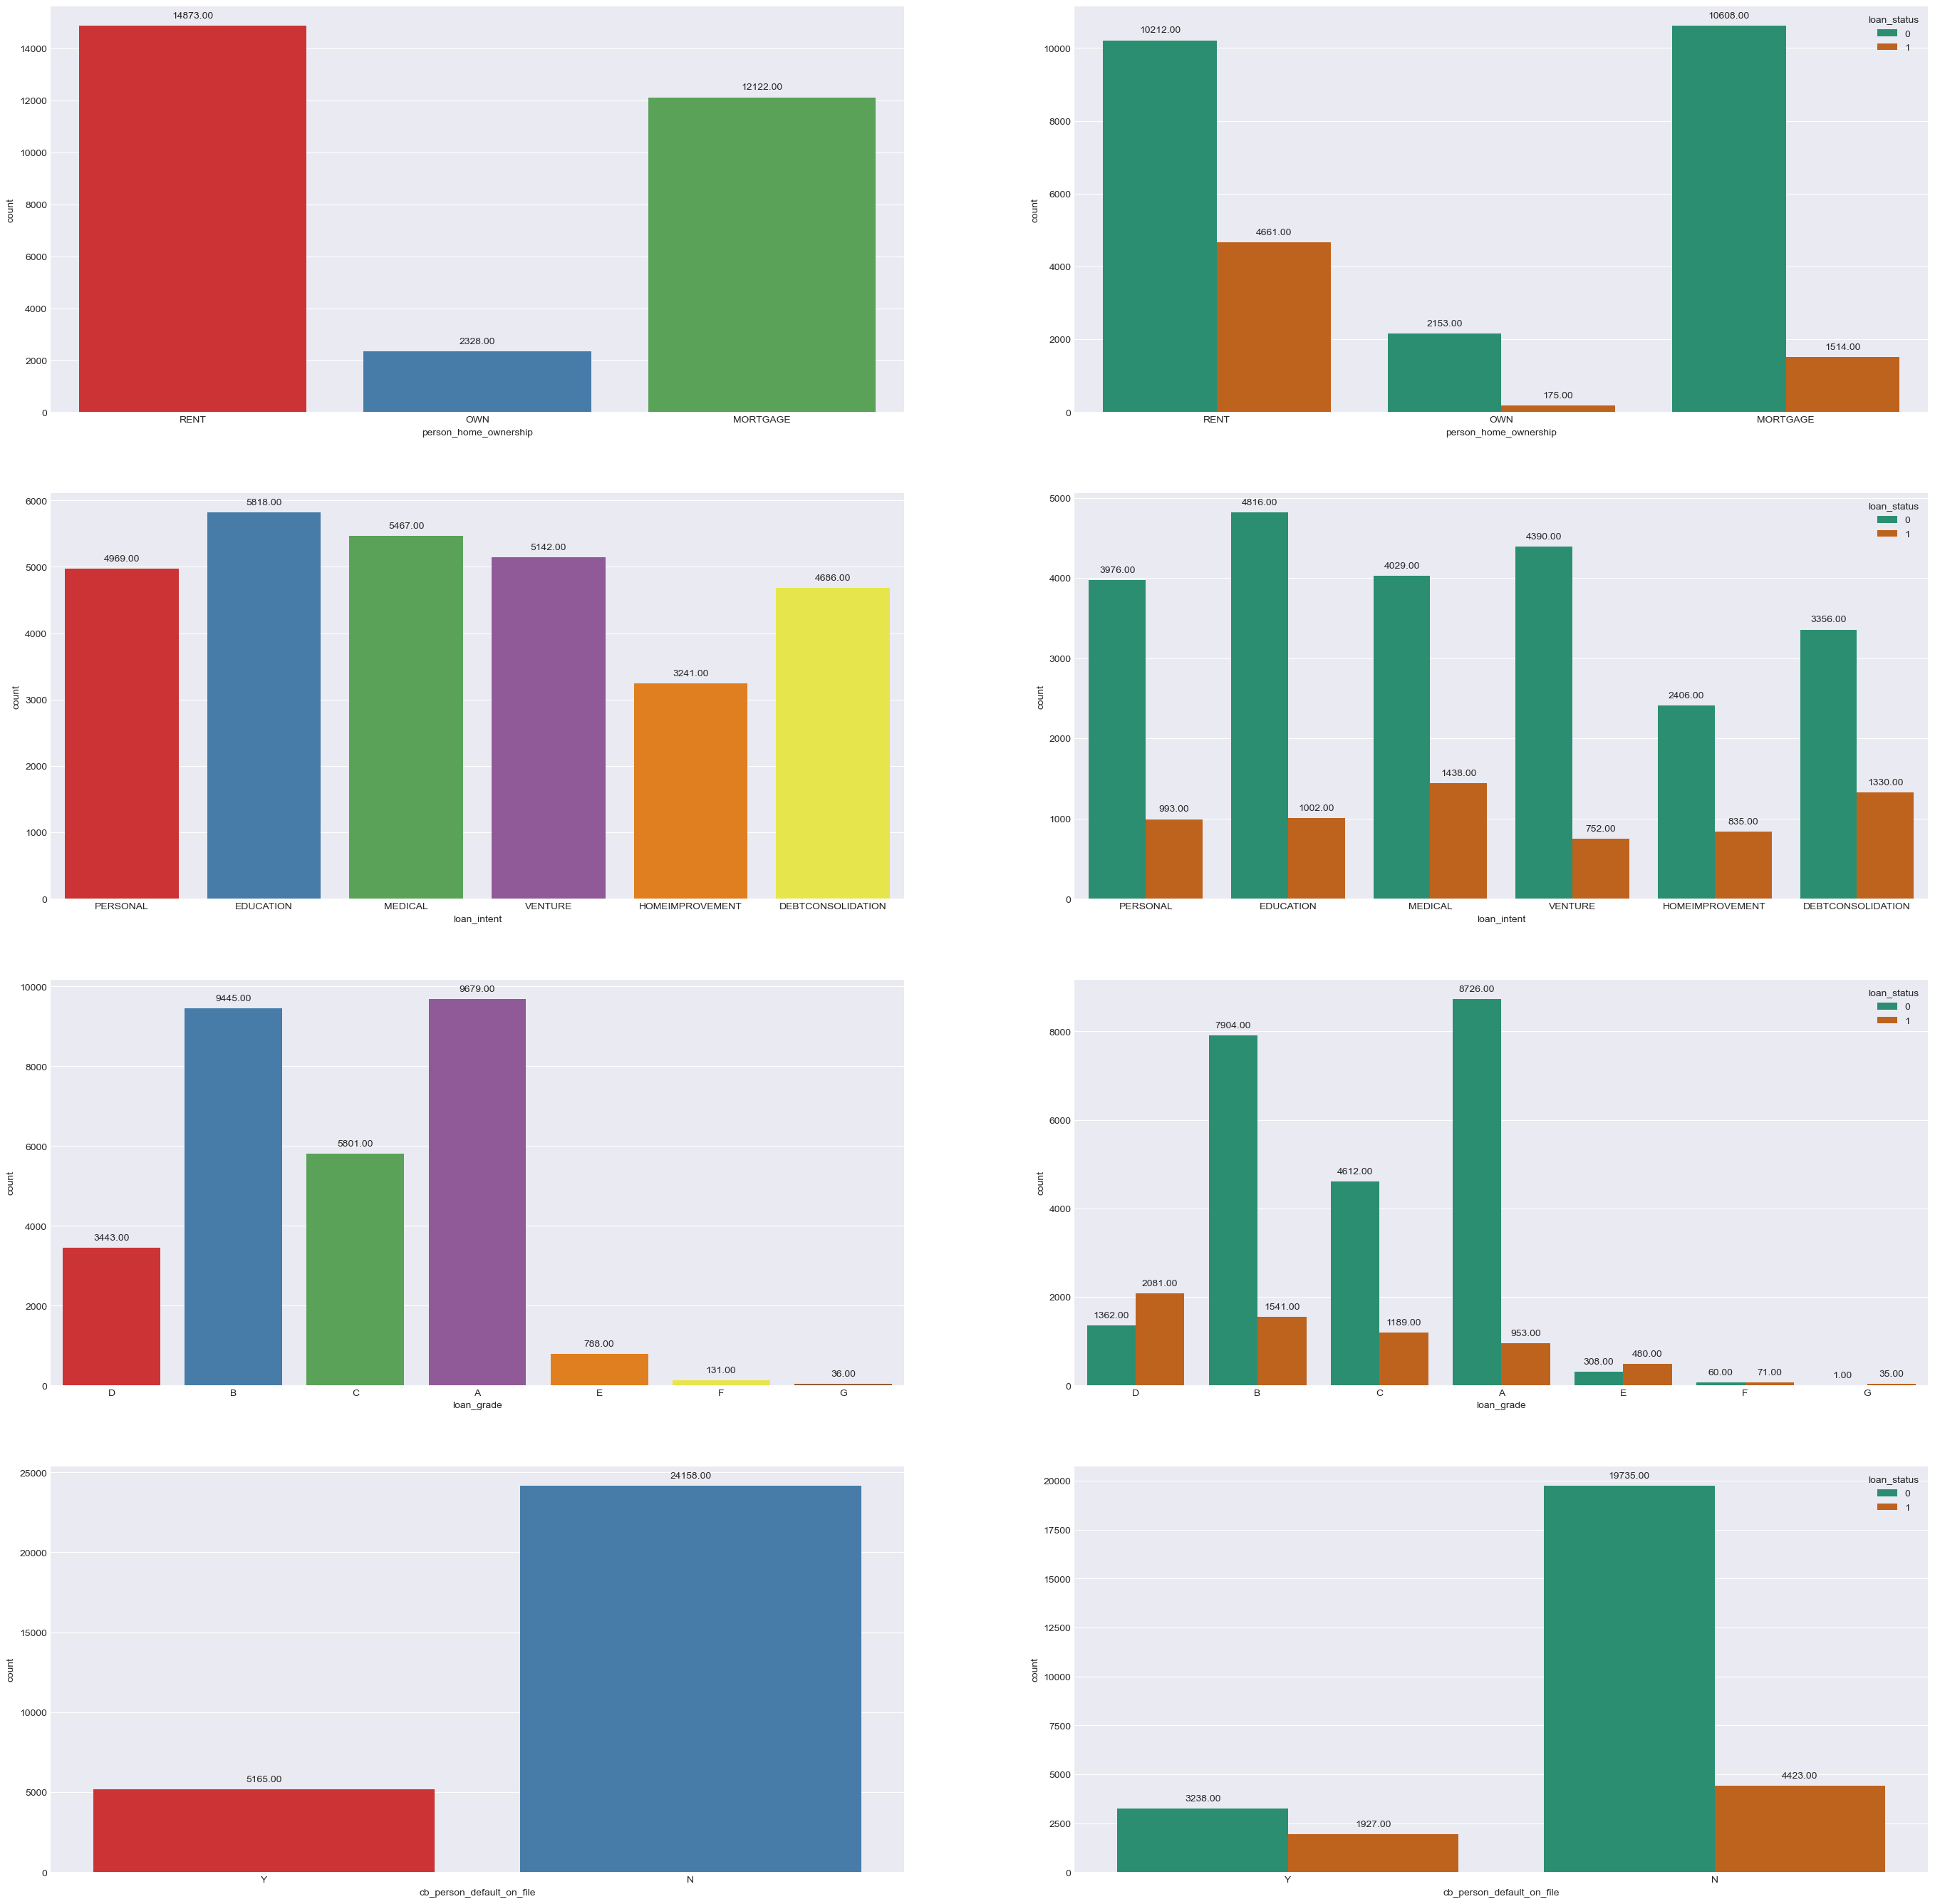

In [102]:
fig, axes = plt.subplots(4,2, figsize = (34, 34))
splot = sns.countplot('person_home_ownership', data = train, ax = axes[0,0], palette = 'Set1')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('person_home_ownership', hue = 'loan_status', data=train, ax = axes[0,1], palette = 'Dark2')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('loan_intent', data = train, ax = axes[1,0], palette = 'Set1')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('loan_intent', hue = 'loan_status', data=train, ax = axes[1,1], palette = 'Dark2')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('loan_grade', data = train, ax = axes[2,0], palette = 'Set1')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('loan_grade', hue = 'loan_status', data=train, ax = axes[2,1], palette = 'Dark2')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('cb_person_default_on_file', data = train, ax = axes[3,0], palette = 'Set1')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot = sns.countplot('cb_person_default_on_file', hue = 'loan_status', data=train, ax = axes[3,1], palette = 'Dark2')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


## <div class="alert alert-block alert-success"><b>Statistics</div>

In [104]:
train_num = train.select_dtypes(include = 'number')
train_cat = train.select_dtypes(include = ['object', 'category'])
train_num.shape, train_cat.shape

((29323, 10), (29323, 9))

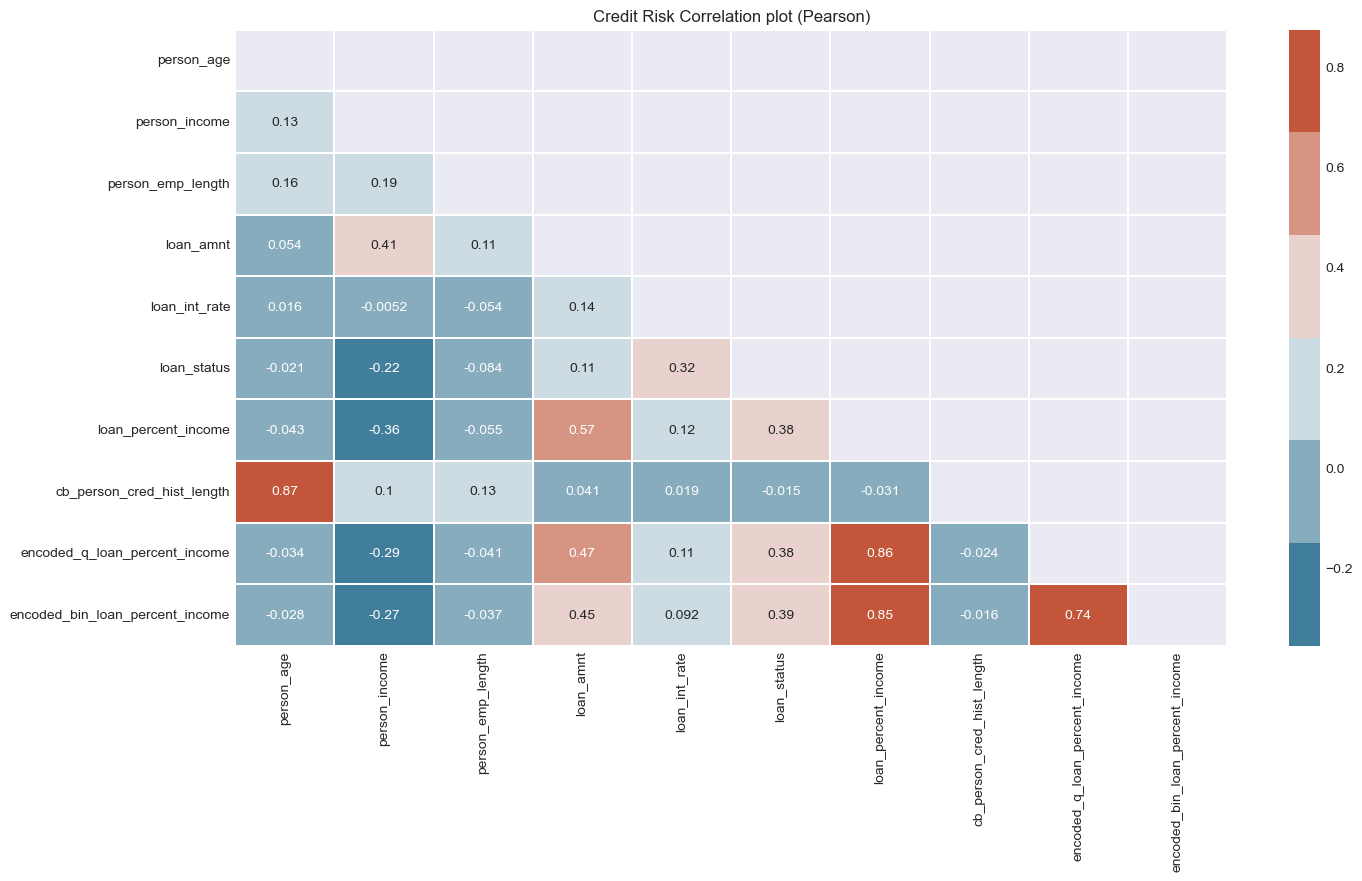

In [124]:
#mask = np.triu(np.ones_like(train.corr(), dtype = bool))
plt.figure(figsize = (16, 8))
plt.title('Credit Risk Correlation plot (Pearson)')
sns.heatmap(train.corr(), annot = True, mask = np.triu(np.ones_like(train.corr(), dtype = bool)), linewidths = .1, cmap = sns.diverging_palette(230, 20));

In [155]:
corr_matrix = train.corr(method = 'pearson')
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,encoded_q_loan_percent_income,encoded_bin_loan_percent_income
person_age,1.000000,0.131138,0.161809,0.053598,0.016141,-0.021399,-0.042840,0.873633,-0.033756,-0.028170
person_income,0.131138,1.000000,0.189887,0.408541,-0.005170,-0.219496,-0.355338,0.104786,-0.291220,-0.272140
person_emp_length,0.161809,0.189887,1.000000,0.111305,-0.054004,-0.084008,-0.055348,0.133965,-0.040810,-0.037278
loan_amnt,0.053598,0.408541,0.111305,1.000000,0.140518,0.107776,0.574145,0.041327,0.472150,0.451731
loan_int_rate,0.016141,-0.005170,-0.054004,0.140518,1.000000,0.315946,0.116319,0.019394,0.110702,0.091756
loan_status,-0.021399,-0.219496,-0.084008,0.107776,0.315946,1.000000,0.381931,-0.015329,0.377815,0.389010
loan_percent_income,-0.042840,-0.355338,-0.055348,0.574145,0.116319,0.381931,1.000000,-0.031211,0.863485,0.854111
cb_person_cred_hist_length,0.873633,0.104786,0.133965,0.041327,0.019394,-0.015329,-0.031211,1.000000,-0.023916,-0.016494
encoded_q_loan_percent_income,-0.033756,-0.291220,-0.040810,0.472150,0.110702,0.377815,0.863485,-0.023916,1.000000,0.743296
encoded_bin_loan_percent_income,-0.028170,-0.272140,-0.037278,0.451731,0.091756,0.389010,0.854111,-0.016494,0.743296,1.000000


**Correlations between features are not high, except age and credit history length**

In [125]:
cor = train.corr()
cor[((cor >= .5) | (cor<= -.5))]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,encoded_q_loan_percent_income,encoded_bin_loan_percent_income
person_age,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.873633,NaN,NaN
person_income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,NaN,NaN,1.000000,NaN,NaN,0.574145,NaN,NaN,NaN
loan_int_rate,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
loan_status,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
loan_percent_income,NaN,NaN,NaN,0.574145,NaN,NaN,1.000000,NaN,0.863485,0.854111
cb_person_cred_hist_length,0.873633,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
encoded_q_loan_percent_income,NaN,NaN,NaN,NaN,NaN,NaN,0.863485,NaN,1.000000,0.743296
encoded_bin_loan_percent_income,NaN,NaN,NaN,NaN,NaN,NaN,0.854111,NaN,0.743296,1.000000


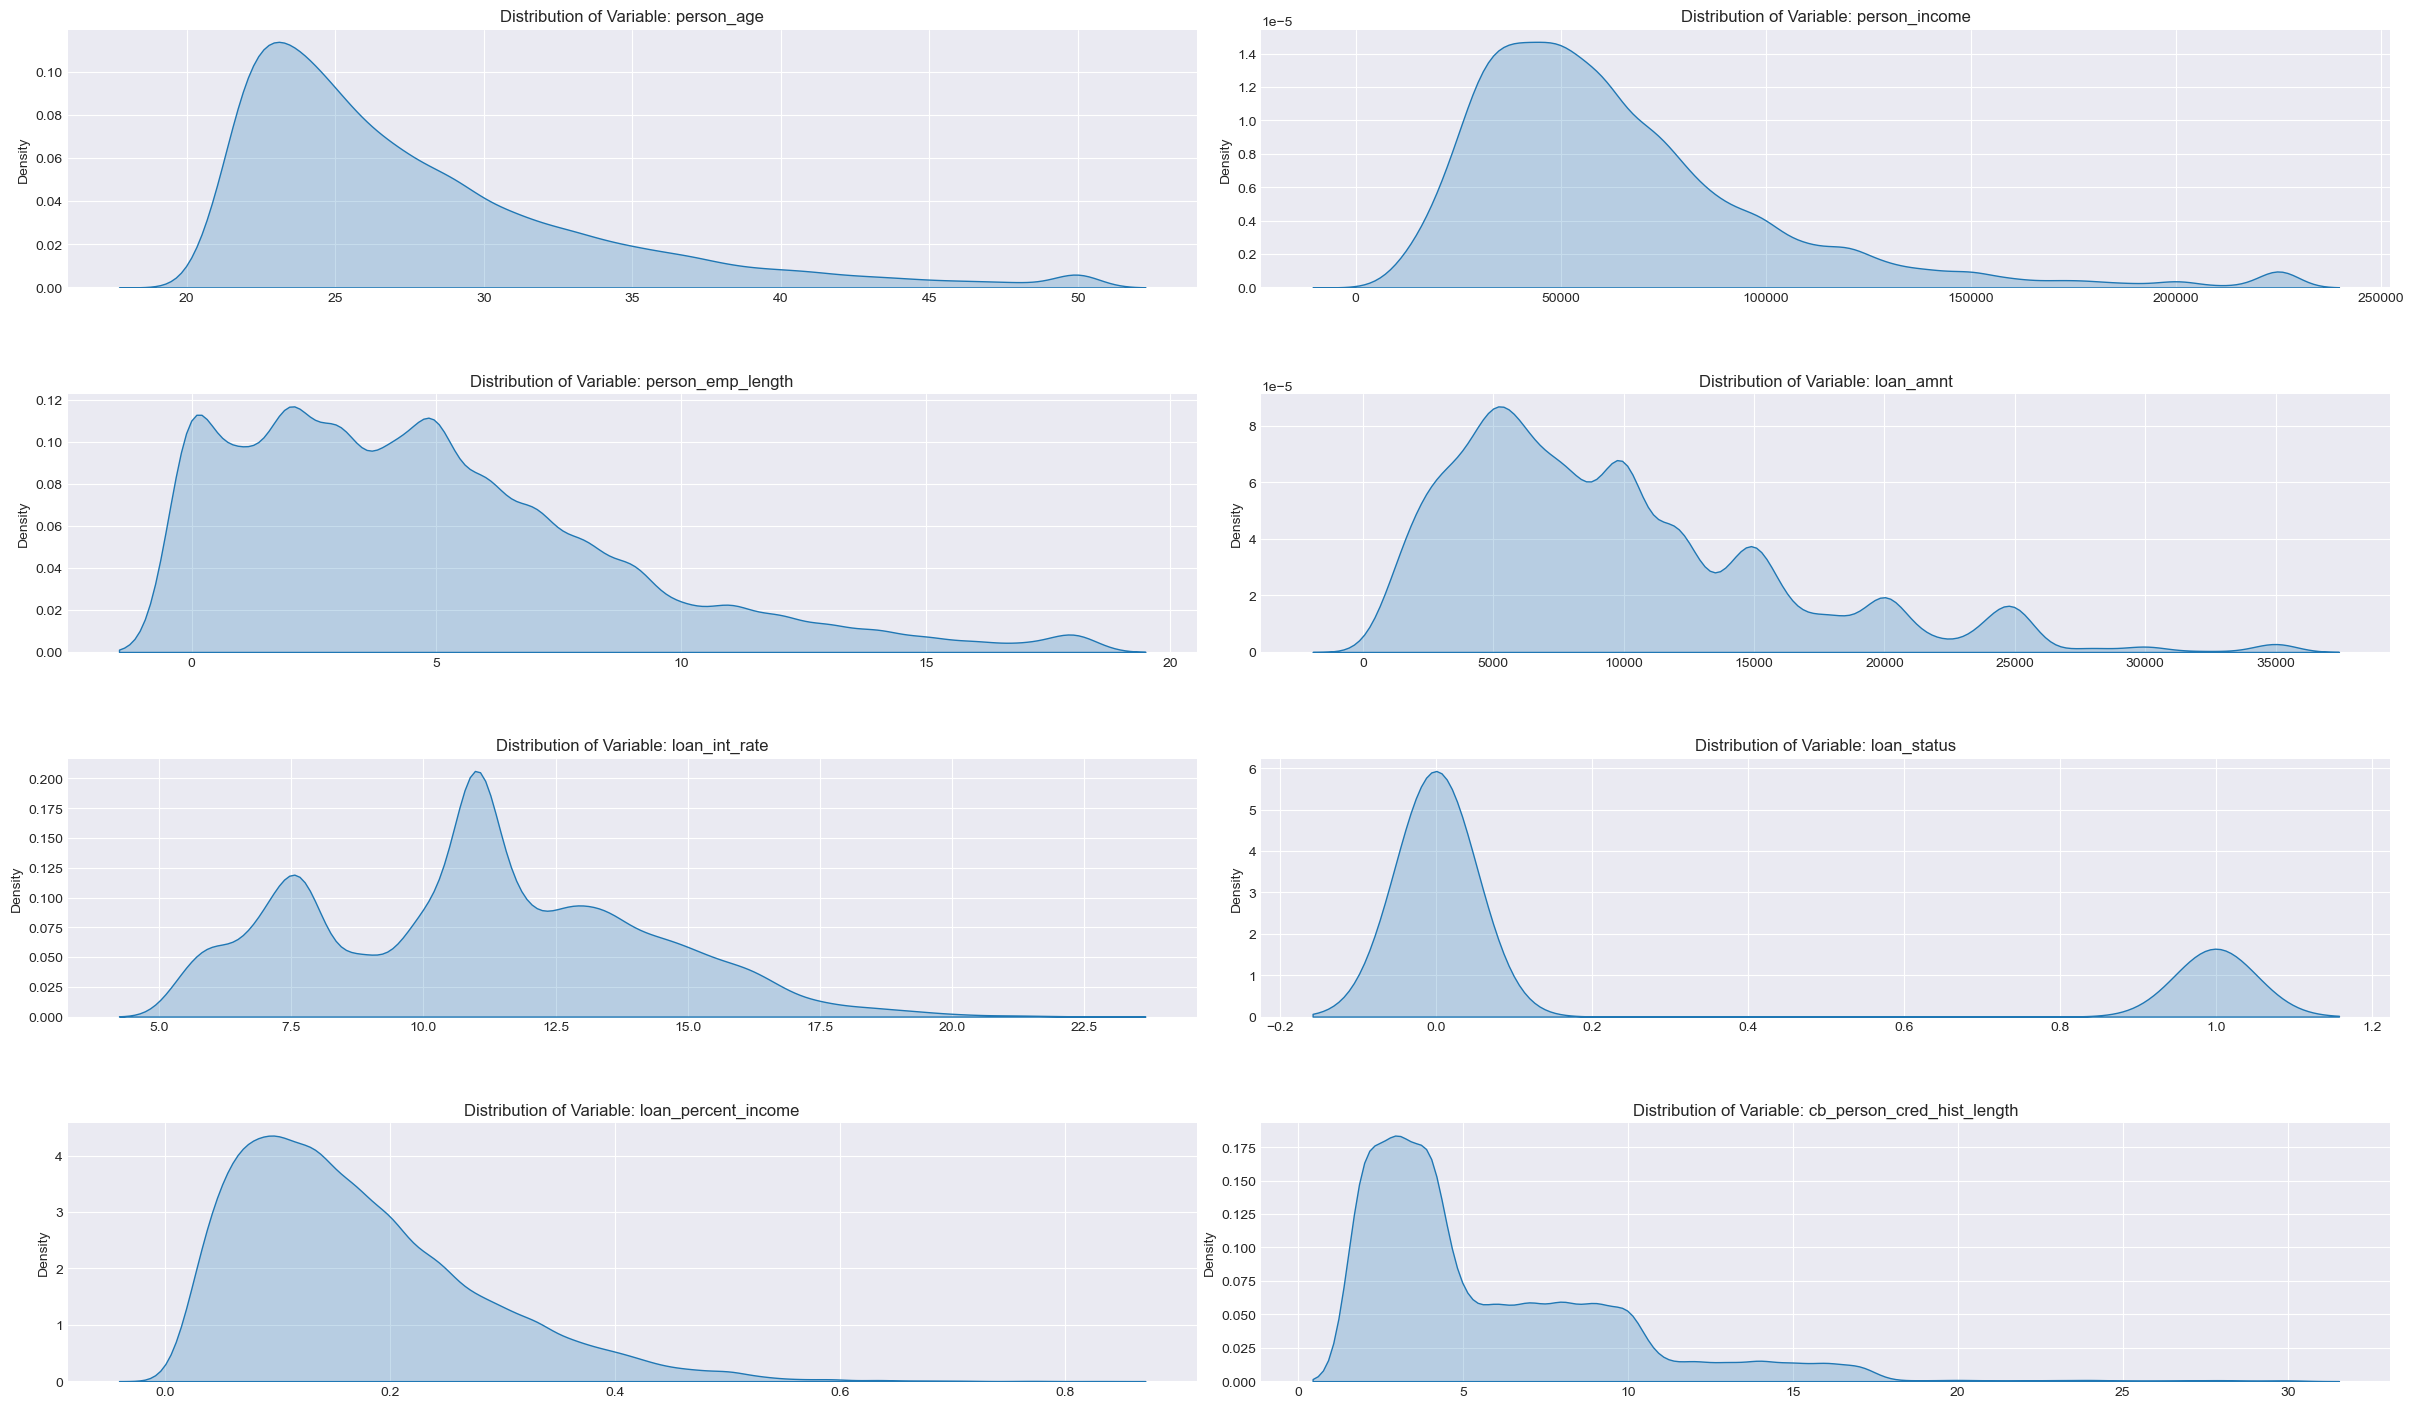

In [126]:
# Visualizing the distribution of observations in a dataset (analogous to a histogram.) 
# KDE represents the data using a continuous probability density curve 
fig, axes = plt.subplots(4,2, figsize = (24, 14)); axes = axes.ravel() 
cols =train.select_dtypes(include = 'number').columns[:]
for col, ax in zip(cols, axes):
    data = train.select_dtypes(include = 'number')
    sns.kdeplot(data=data, x=col, shade=True, ax = ax, palette = 'Set1')
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
#fig.delaxes(axes[8])
ax.xaxis.label.set_size(20); fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0); plt.show()

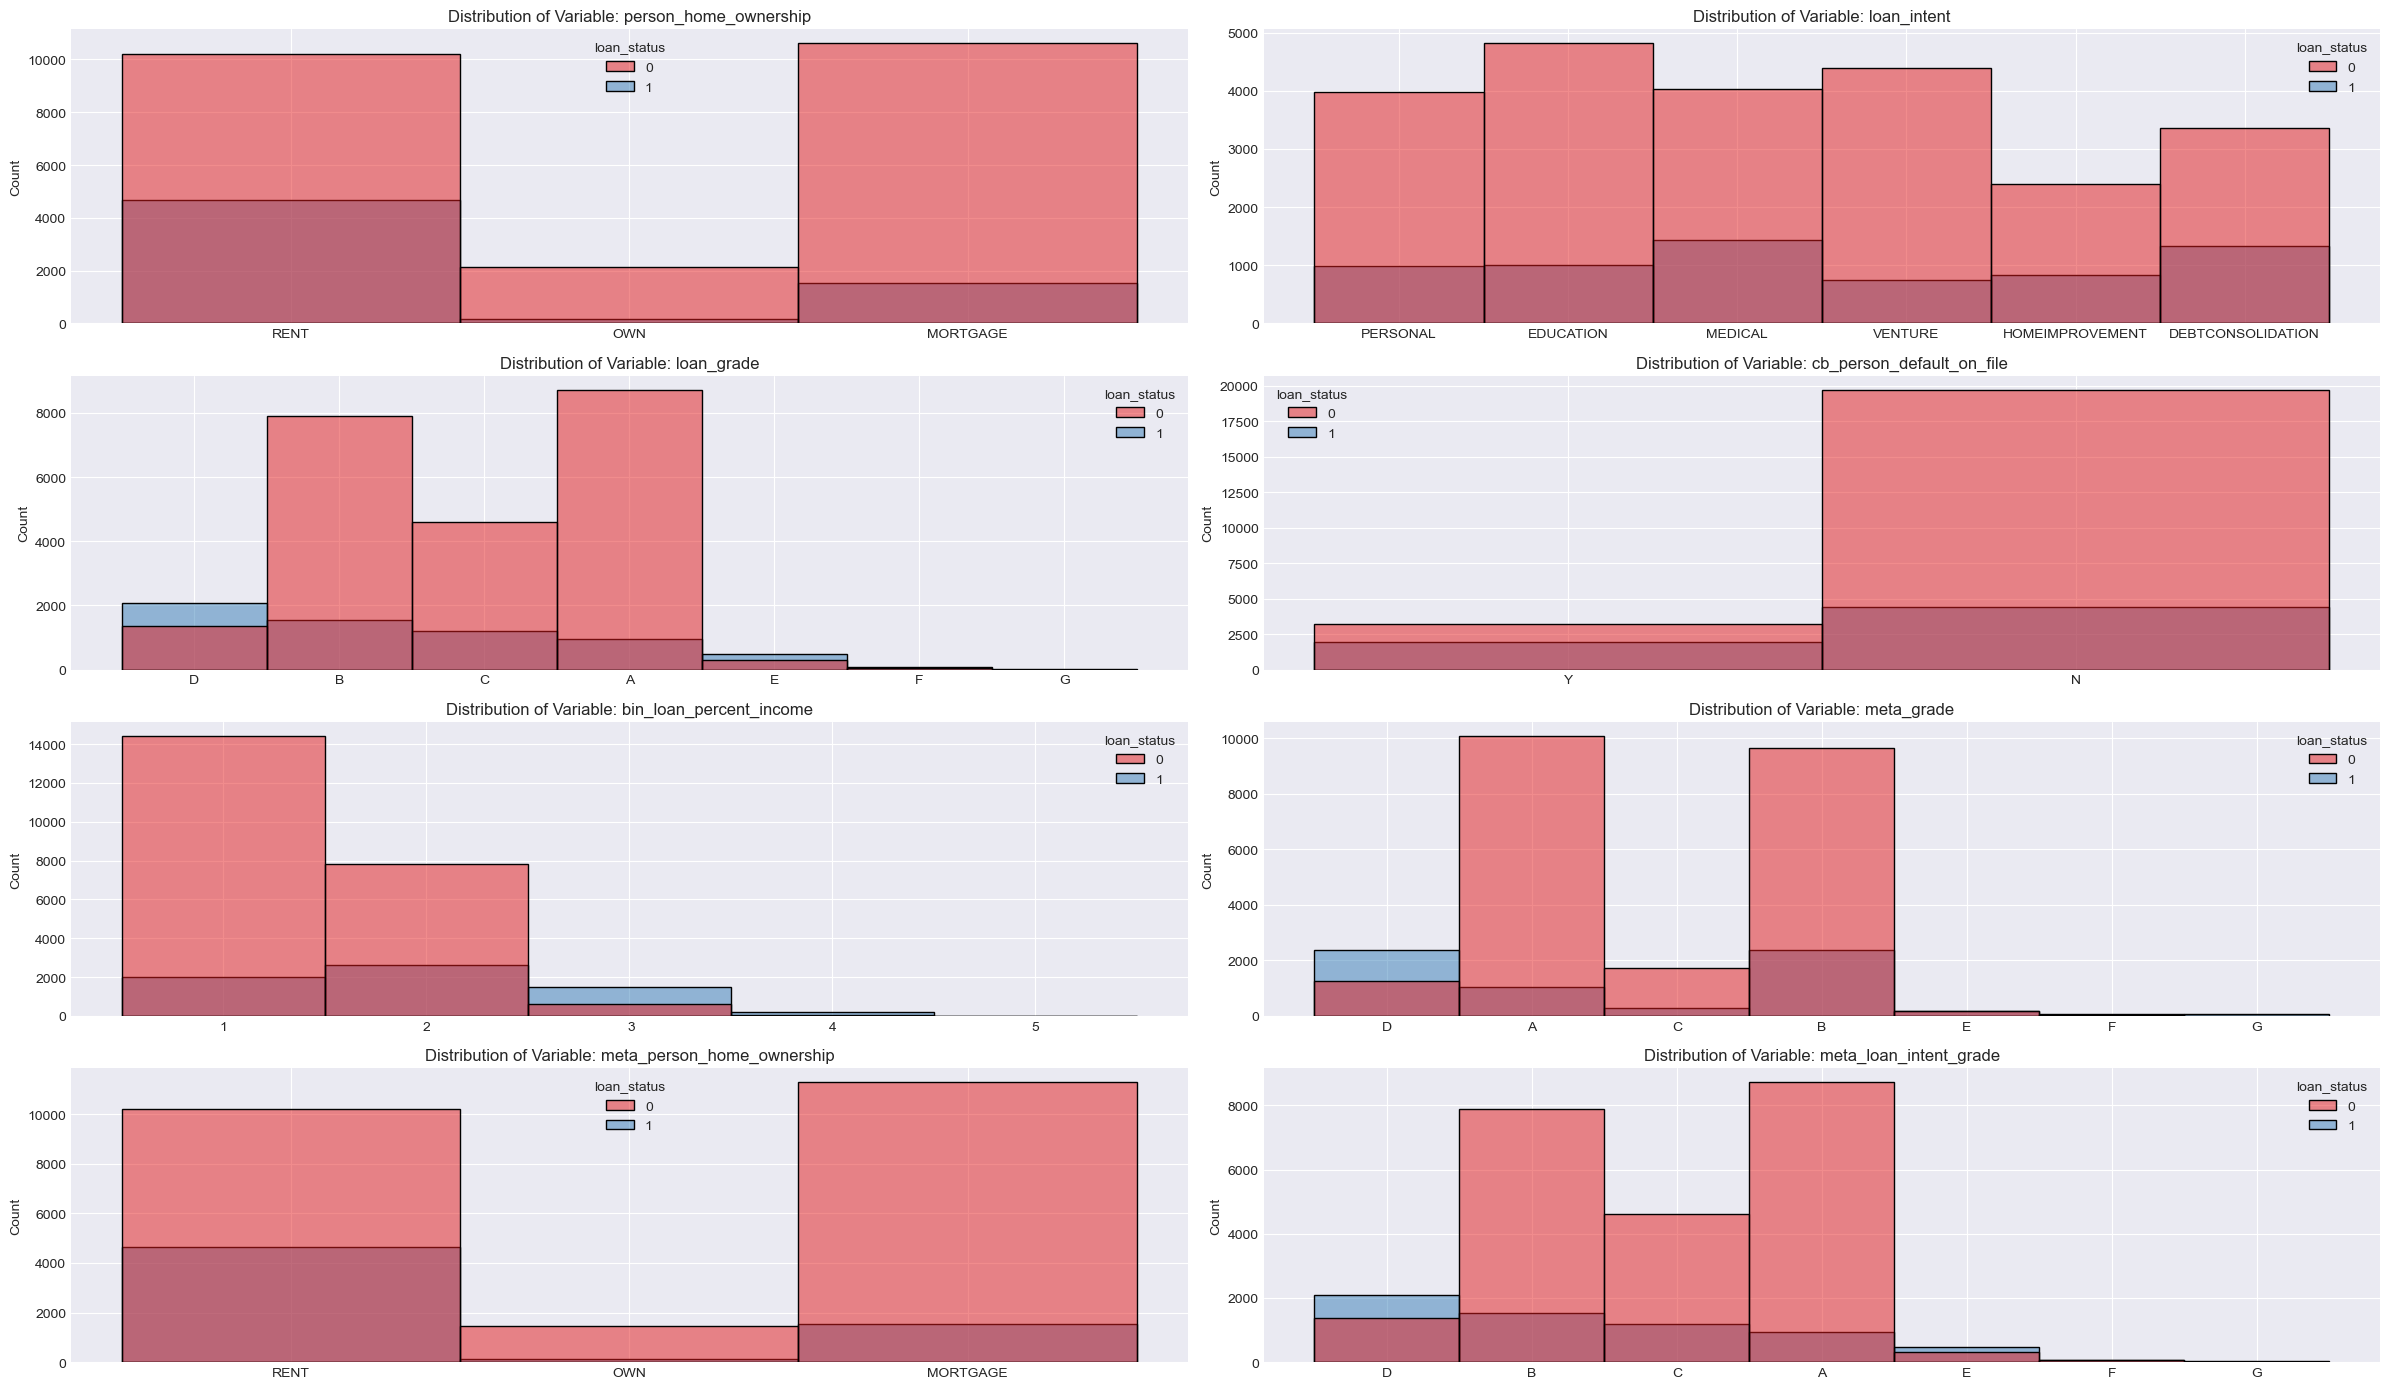

In [130]:
# Visualizing categorical variables with Loan status color  encoding
fig, axes = plt.subplots(4,2, figsize = (24, 14))
axes = axes.ravel() 
cols =train_cat.columns[:]
for col, ax in zip(cols, axes):
    data = train
    sns.histplot(data=data, x=col, ax = ax, bins=20, hue= 'loan_status',palette = 'Set1')
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)

#fig.delaxes(axes[8])
ax.xaxis.label.set_size(20)
fig.tight_layout()
plt.show()

In [137]:
train.skew()

person_age                         1.505066
person_income                      1.713806
person_emp_length                  1.033975
loan_amnt                          1.188162
loan_int_rate                      0.216692
loan_status                        1.376372
loan_percent_income                1.060686
cb_person_cred_hist_length         1.647017
encoded_q_loan_percent_income      1.455052
encoded_bin_loan_percent_income    2.326313
dtype: float64

In [ ]:
# def remove_outlier(train_in, col_name):
#     q1 = train_in[col_name].quantile(0.25)
#     q3 = train_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     train_out = train_in.loc[(train_in[col_name] > fence_low) & (train_in[col_name] < fence_high)]
#     return train_out

In [ ]:
# # Treating outliers
# def outlier_detect(train):
#     for i in train.describe().columns:
#         Q1=train.describe().at['25%',i]
#         Q3=train.describe().at['75%',i]
#         IQR=Q3 - Q1
#         LTV=Q1 - 1.5 * IQR
#         UTV=Q3 + 1.5 * IQR
#         x=np.array(train[i])
#         p=[]
#         for j in x:
#             if j < LTV or j>UTV:
#                 p.append(train[i].median())
#             else:
#                 p.append(j)
#         train[i]=p
#     return train

In [ ]:
# train_outliers = train_num[['person_age',
#   'person_income',
#   'person_emp_length',
#   'loan_amnt',
#   'loan_int_rate',
  
#   'loan_percent_income',
#   'cb_person_cred_hist_length']]

In [ ]:
# fig, axes = plt.subplots(8, 1, figsize = (34, 54))
# axes = axes.ravel() 
# cols =train_outlier_clean.columns[:]

# for col, ax in zip(cols, axes):
#     data = train_outlier_clean
#     sns.boxplot(data=data, x=col, ax = ax, palette = 'Set1')
#     ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
# #fig.delaxes(axes[8])
# fig.tight_layout()
# plt.show()

In [ ]:
# make long feature names shorter
train_ml= train_all.rename(columns = {"cb_person_default_on_file":"default_hist", "cb_person_cred_hist_length": "cr_hist_len"})

In [ ]:
# train_ml['person_emp_length'].fillna((train_ml['person_emp_length'].median()), inplace=True)
# train_ml['loan_int_rate'].fillna((train_ml['loan_int_rate'].median()), inplace = True)

In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29323 entries, 0 to 32580
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   person_age                       29323 non-null  int64   
 1   person_income                    29323 non-null  int64   
 2   person_home_ownership            29323 non-null  object  
 3   person_emp_length                29323 non-null  float64 
 4   loan_intent                      29323 non-null  object  
 5   loan_grade                       29323 non-null  object  
 6   loan_amnt                        29323 non-null  int64   
 7   loan_int_rate                    29323 non-null  float64 
 8   loan_status                      29323 non-null  int64   
 9   loan_percent_income              29323 non-null  float64 
 10  cb_person_default_on_file        29323 non-null  object  
 11  cb_person_cred_hist_length       29323 non-null  int64   
 12  bin_

In [168]:
encoded_char_col = pd.get_dummies(train)
encoded_char_col

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,encoded_q_loan_percent_income,encoded_bin_loan_percent_income,...,meta_loan_intent_grade_C,meta_loan_intent_grade_D,meta_loan_intent_grade_E,meta_loan_intent_grade_F,meta_loan_intent_grade_G,"q_loan_percent_income_(-0.001, 0.08]","q_loan_percent_income_(0.08, 0.12]","q_loan_percent_income_(0.12, 0.18]","q_loan_percent_income_(0.18, 0.25]","q_loan_percent_income_(0.25, 0.83]"
0,22,59000,18.0,35000,16.02,1,0.59,3,0.530526,0.756272,...,0,1,0,0,0,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0.118800,0.121887,...,0,0,0,0,0,0,1,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0.530526,0.756272,...,1,0,0,0,0,0,0,0,0,1
3,23,65500,4.0,35000,15.23,1,0.53,2,0.530526,0.756272,...,1,0,0,0,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,1,0.55,4,0.530526,0.756272,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,50,64500,0.0,5000,11.26,0,0.08,20,0.114165,0.121887,...,0,0,0,0,0,1,0,0,0,0
32576,50,53000,1.0,5800,13.16,0,0.11,30,0.118800,0.121887,...,1,0,0,0,0,0,1,0,0,0
32577,50,120000,4.0,17625,7.49,0,0.15,19,0.149478,0.121887,...,0,0,0,0,0,0,0,1,0,0
32579,50,150000,5.0,15000,11.48,0,0.10,26,0.118800,0.121887,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
cr_clean2 = pd.concat([num_col, encoded_char_col], axis=1)
cr_clean2.tail(2)

In [ ]:
# cr_clean3 = num_col.join(encoded_char_col)
# cr_clean3

## <div class="alert alert-block alert-success"><b>Model</div>

 When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bed- rooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [ ]:
from sklearn import model_selection,linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

In [ ]:
train_cat.columns

In [ ]:
train_cat = pd.get_dummies(train.select_dtypes(include = ['object', 'category']))
train = pd.concat([train_num, train_cat], axis=1)

In [ ]:
# Split Train and Test Sets
# Y = cr_clean2['loan_status']
# X = cr_clean2.drop('loan_status',axis=1)
Y = train['loan_status']
X = train.drop(['loan_status'], axis = 1)
#one_hot_encoded_training_predictors = pd.get_dummies
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=2020, test_size=.32)
log_clf = linear_model.LogisticRegression()
log_clf.fit(x_train, np.ravel(y_train))

In [ ]:
Y = test
X = train.drop(['loan_status'], axis = 1)
#one_hot_encoded_training_predictors = pd.get_dummies
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=2020, test_size=.32)
log_clf = linear_model.LogisticRegression()
log_clf.fit(x_train, np.ravel(y_train))

In [ ]:
y_pred = log_clf.predict(x_test)
score =accuracy_score(y_test,y_pred)
score

In [ ]:
pca_accuracy = round(log_clf.score(x_test,y_test),6)
pca_accuracy

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

**Let's display probabilities of default**

In [ ]:
prob_default = pd.DataFrame(log_clf.predict_proba(x_test)[:, 1], columns = ['prob_default'])
prob_default.head(2)

In [ ]:
prediction_default = pd.concat([y_test.reset_index(drop=True), prob_default], axis = 1)
prediction_default

In [ ]:
result = x_test.join(y_test)
result.iloc[:,3].shape

In [ ]:
col_effect = pd.DataFrame()
col_effect['col_names'] = X.columns
col_effect['col_coef'] = log_clf.coef_[0]
col_effect.sort_values(by='col_coef', ascending=False)

**If a coefficient is more positive, the person is more likely to default on the loan, when the coefficient is more negative the person is less likely to default.**

In [ ]:
# pd.DataFrame(log_clf.coef_[0],
#             X.columns,
#             columns = ['coef']).sort_values(by='coef', ascending=False)

In [ ]:
int_val = float(log_clf.intercept_)
print('The overall probablity of non default is {:.3%}'.format(int_val))

In [ ]:
int_val

In [ ]:
# scaler = MinMaxScaler(feature_range=[0, 1])
# data_rescaled = scaler.fit_transform(num_col)

# #Fitting the PCA algorithm with our Data
# pca = PCA().fit(data_rescaled)
# #Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('Hotel Booking Dataset Explained Variance')
# plt.show()

In [ ]:
# random forest paraeters tuned using optuna. Code down below
random_forest_parameters = {'n_estimators': 102, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 3}


# choosing model
model_name = RandomForestClassifier(n_jobs=-1, random_state=random_seed, **random_forest_parameters)

# giving all values to pipeline
rf_pipe = make_pipeline(preprocessor,model_name)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=2020, test_size=.30)
#Start of gradient boosted tree
xgb_model = xgb.XGBClassifier() # initialize tree

xgb_model.fit(x_train, np.ravel(y_train)) # train tree

predict_xgb = xgb_model.predict_proba(x_test) # 1st col = pred val, 2nd col = pred prob
predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)

In [ ]:
pca_accuracy = round(xgb_model.score(x_test,y_test),6)
pca_accuracy